#### Creating a simple SVM model 

Support Vector Machines (SVMs) are one of the world's most popular machine learning models used for classification and regression problems.

##### Step 1: Loading Required Libraries 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

##### Step 2: Pre-Processing

In [6]:
#Loading the breast cancer data set from scikit-learn
from sklearn.datasets import load_breast_cancer

In [7]:
#creating an instance of the dataset 
cancer_data = load_breast_cancer()

In [20]:
#Let's begin by seeing what the dataset contain 
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
#converting just the data part of the cancer_data to a pandas dataframe 
raw_data = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])

In [9]:
raw_data.head()    #this is the input to the machine learning model (SVM), would later form the x-component 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
list(raw_data.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [27]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [30]:
print(cancer_data['target_names'])

['malignant' 'benign']


In [46]:
print(cancer_data['target'])   #this is the correct output of the dataset

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

##### Step 3: Splitting the dataset for Testing and Training

In [31]:
# Splitting the dataset for training and testing 
x = raw_data            #input dataframe 
y = cancer_data['target']  #outputs 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

##### Step 4: Creating and Training

In [34]:
#importing Support Vector Classification in-built model 
from sklearn.svm import SVC

In [35]:
#creating an instance of the model
model = SVC()

In [36]:
#training the model 
model.fit(x_training_data, y_training_data)

SVC()

##### Step 5: Testing 

In [37]:
#testing 
predictions = model.predict(x_test_data)

In [39]:
print(predictions)

[0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0
 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0]


##### Performance measurement techniques used: Classification report and Confusion matrix

In [41]:
from sklearn.metrics import classification_report 

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        72
           1       0.87      1.00      0.93        99

    accuracy                           0.91       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.91      0.91       171



Classification report terms used:

    RECALL - 
"how many of this class you found over the whole number of elements of this class"
//for benign breast cancer casses - model found 80%. Which means if there were total 100 benign cases in 500 records, this model found 80 cases. "specificty"

Malignant: 100%. which means if another 400 were mlignant out of total 500 records, this model did classify 400 as malignant. (if the records classified as malignant were actually malignant, we don't know. its talked about in precision).  "senstivity"

Recall only talks about number of classifications in a class. 

    PRECISION - 
how many are correctly classified among that class. 
For benign cases, precision= 1.00 means all the records the model identified as benign were actually benign!
for malignant cases precision = 0.87, i.e. for all the cases the model said were malignant, only 87% of them were actually malignant ==> 13% false positive rate.

    F-1 SCORE- 
harmonic mean between precision and recall 

    SUPPORT- 
Number of actual occurences of the class in the dataset (x_test_data)

In [44]:
print(confusion_matrix(y_test_data, predictions))

[[57 15]
 [ 0 99]]


Understanding the confusion matrix:

###### 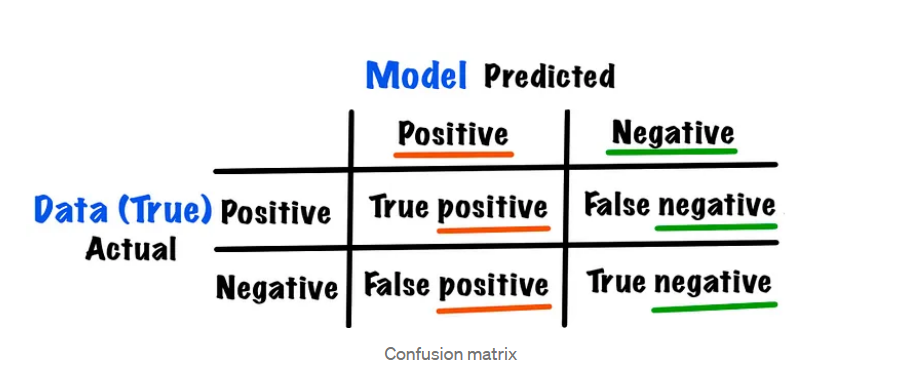